In [102]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [103]:
def fix_legend(ax):
    leg = ax.legend_
    for t in leg.texts:
        t.set_text(t.get_text()[:5])

def explode(df, col, val):
    df[col] = [val] * len(df)
    return df.explode(col)

def load_results(task, dataset):
    pickles = glob(f'results/{task}_{dataset}*')
    priv_pkl = pickles.pop(pickles.index(f'results/{task}_{dataset}_gcn_priv.pkl'))
    df_priv = pd.read_pickle(priv_pkl)
    df_results = df_priv[df_priv['pr'] == 1]
    eps_list = df_results['eps'].unique()
    
    for file in pickles:
        df = pd.read_pickle(file)
        df = explode(df, 'eps', eps_list)
        df_results = df_results.append(df, ignore_index=True)
        
    df_results['method'] = df_results['method'].apply(lambda x: x.replace('+void', ''))
    return df_results

def draw_pr_results(task, dataset):
    eps_list = [1,3,5]
    df_priv = pd.read_pickle(f'results/{task}_{dataset}_gcn_priv.pkl')
    df_raw = pd.read_pickle(f'results/{task}_{dataset}_gcn_raw.pkl')
    df_raw = explode(df_raw, 'eps', eps_list)
    df_result = df_priv.append(df_raw, ignore_index=True)
    ax = sns.lineplot(data=df_result, x='pr', y='perf', hue='eps', hue_order=eps_list, ci='sd',
                     markers=True, style='eps', style_order=eps_list, 
                      dashes=False, legend=False)
    ax.legend(labels=eps_list, title='eps')
    ax.set_title(dataset)
    return ax

def draw_error_results(dataset, x='deg', hue='eps'):
    df = pd.read_pickle(f'results/errorest_{dataset}_gcn_priv.pkl')
    if x != 'pr': 
        df = df[df['pr'] == 1]
    eps_list = df['eps'].unique()
    if hue == 'eps':
        df['eps'] = df['eps'].apply(lambda x: f'ε={x}')
    df = df.explode('perf')
    df[['err','deg']] = pd.DataFrame(df['perf'].tolist(),index=df.index)
    ax = sns.lineplot(data=df, x=x, y='err', hue=hue, ci='sd', legend=False)
    ax.set_title(dataset)
    if hue: ax.legend(labels=eps_list, title='eps')
    return ax

# Node Classification

## Comparison of different methods

Text(0.5, 1.0, 'cora')

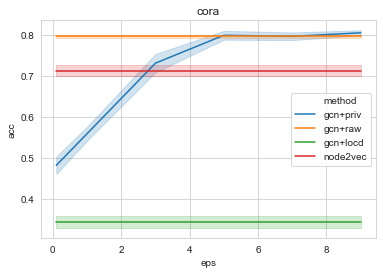

In [151]:
dataset = 'cora'
df_result = load_results(task='nodeclass', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('acc')
ax.set_title(dataset)

Text(0.5, 1.0, 'citeseer')

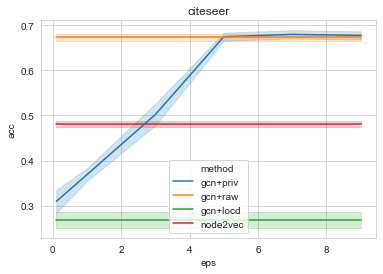

In [120]:
dataset = 'citeseer'
df_result = load_results(task='nodeclass', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('acc')
ax.set_title(dataset)

Text(0.5, 1.0, 'pubmed')

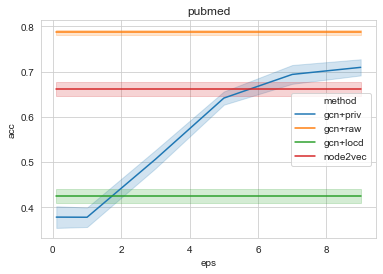

In [123]:
dataset = 'pubmed'
df_result = load_results(task='nodeclass', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('acc')
ax.set_title(dataset)

Text(0.5, 1.0, 'flickr')

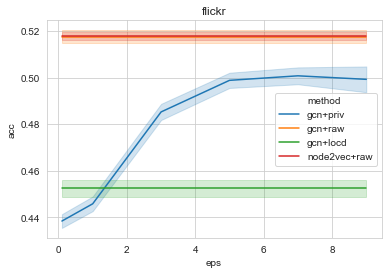

In [152]:
dataset = 'flickr'
df_result = load_results(task='nodeclass', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('acc')
ax.set_title(dataset)

## Comparison of private feature ratios

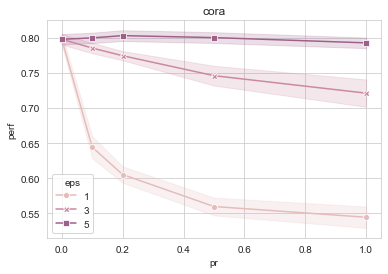

In [119]:
draw_pr_results('nodeclass', 'cora')

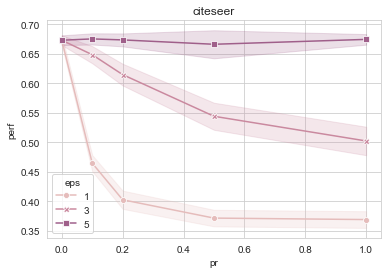

In [121]:
draw_pr_results('nodeclass', 'citeseer')

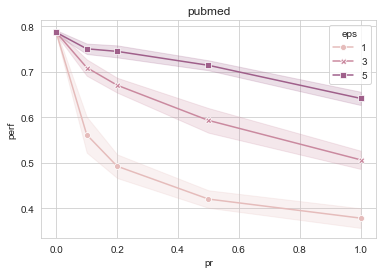

In [124]:
draw_pr_results('nodeclass', 'pubmed')

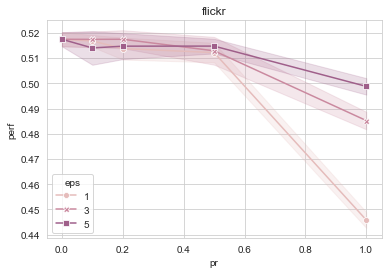

In [153]:
draw_pr_results('nodeclass', 'flickr')

# Link Prediction

## Comparison of different methods

Text(0.5, 1.0, 'cora')

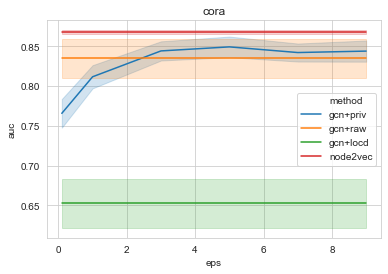

In [145]:
dataset = 'cora'
df_result = load_results(task='linkpred', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('auc')
ax.set_title(dataset)

Text(0.5, 1.0, 'citeseer')

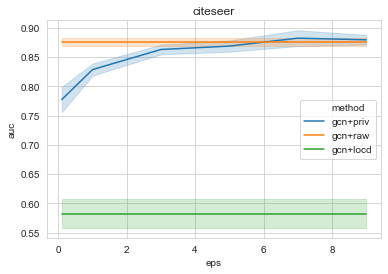

In [146]:
dataset = 'citeseer'
df_result = load_results(task='linkpred', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('auc')
ax.set_title(dataset)

Text(0.5, 1.0, 'pubmed')

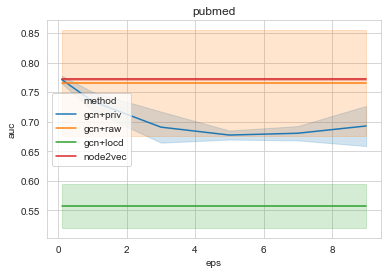

In [155]:
dataset = 'pubmed'
df_result = load_results(task='linkpred', dataset=dataset)
ax = sns.lineplot(data=df_result, x='eps', y='perf', hue='method', ci='sd')
ax.set_ylabel('auc')
ax.set_title(dataset)

## Comparison of private feature ratios

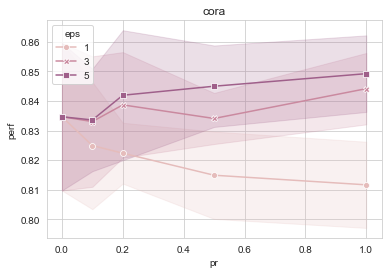

In [156]:
draw_pr_results('linkpred', 'cora')

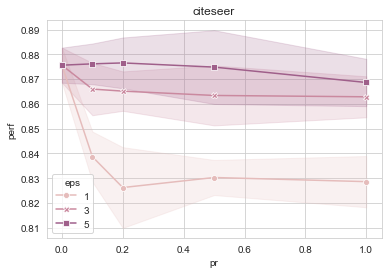

In [157]:
draw_pr_results('linkpred', 'citeseer')

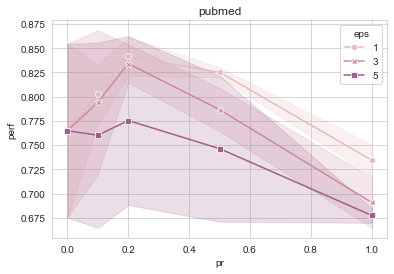

In [158]:
draw_pr_results('linkpred', 'pubmed')

# Error Estimation

## Effect of node degree

(0, 50)

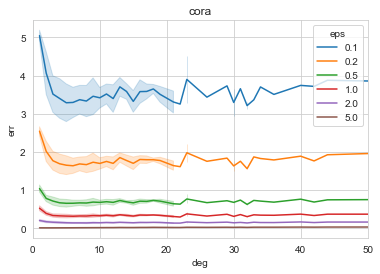

In [149]:
ax = draw_error_results('cora')
ax.set_xlim(0, 50)

(0, 30)

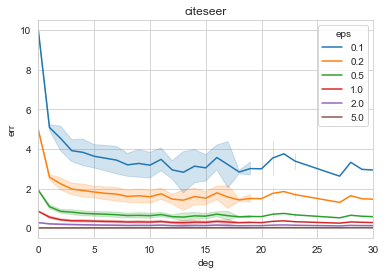

In [105]:
ax = draw_error_results('citeseer')
ax.set_xlim(0, 30)

(0, 50)

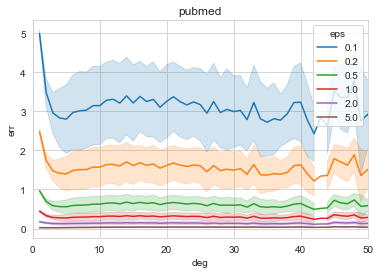

In [106]:
ax = draw_error_results('pubmed')
ax.set_xlim(0, 50)

(0, 500)

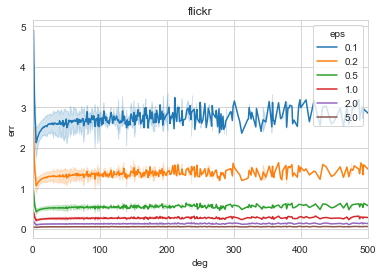

In [107]:
ax = draw_error_results('flickr')
ax.set_xlim(0, 500)

## Effect of epsilon

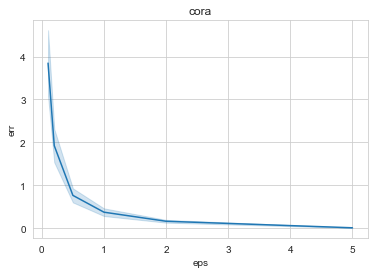

In [108]:
ax = draw_error_results('cora', x='eps', hue=None)

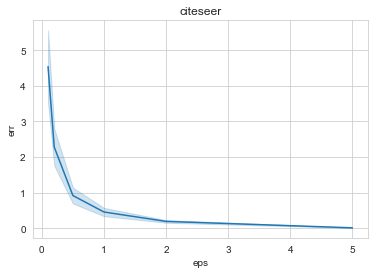

In [109]:
ax = draw_error_results('citeseer', x='eps', hue=None)

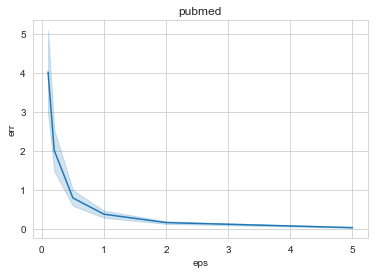

In [110]:
ax = draw_error_results('pubmed', x='eps', hue=None)

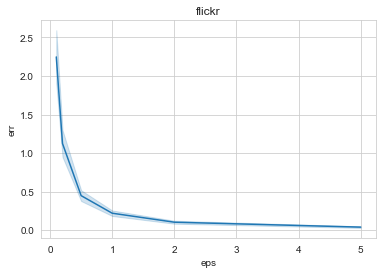

In [111]:
ax = draw_error_results('flickr', x='eps', hue=None)

## Effect of private ratios

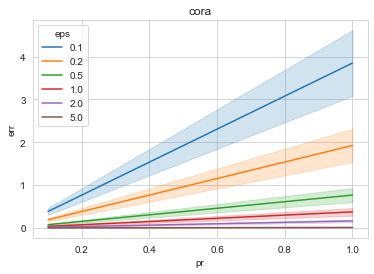

In [112]:
draw_error_results('cora', x='pr', hue='eps')

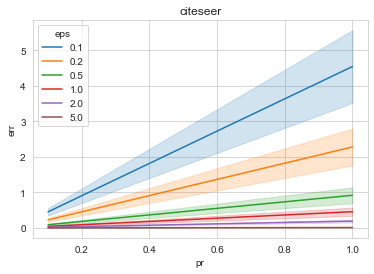

In [113]:
draw_error_results('citeseer', x='pr', hue='eps')

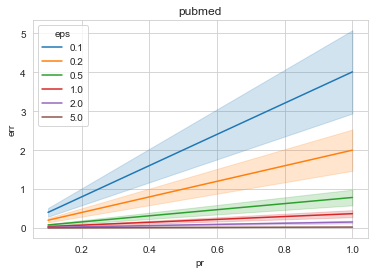

In [114]:
draw_error_results('pubmed', x='pr', hue='eps')

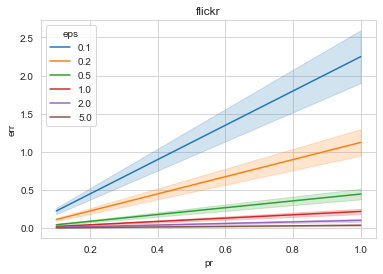

In [115]:
draw_error_results('flickr', x='pr', hue='eps')